**Data Analysis and Visualization Lab - Midterm Exam - Fall 2023** <br>
Please note:
- Total marks are 30
- No internet or helping material is allowed
- You can use Google colab (if Jupyter is not installed on your system )
- Please submit your code on **Google Classroom**
- Add #Roll_Number as filename and download the .ipynb file, submit the file. No link sharing is allowed. No PDF/ZIP will be acceptable.
-Submit all question in single notebook file.
- The allowed time is **2 hour** including submission time


# **QUESTION 01** : [15 Marks]


##From Emails (data.csv) dataset perform feature extraction using tf-idf & Naive Bayes.

Libraries, you can add more as per required.

In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
pip install opencv-python

In [ ]:
import demoji
import cv2
import spacy
import nltk
import math
import os
import pandas as pd
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-65-fd9ea0a4ff38>:19: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


###1. Data Loading:
Read the dataset 'data.csv'.

In [ ]:
import re
data = pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


###2.Data Preprocessing:
Discard the first column as it's not required for the analysis.

In [ ]:
# Already removed

Set the second column as the target variable.

In [ ]:
# Already done

Process the tweets (third column) by:
  1. Removing URLs.
  2. Eliminating emojis.
  3. Removing punctuation marks.

In [ ]:
# removing URLs and Puntuation Marks
def textclean(text):
    text = re.sub(r'[^A-Za-z ]+', ' ', text)
    text = ' '.join(text.split())
    return text

data['textclean'] = data['text'].apply(textclean)

print("Text Cleaned")
print(data['textclean'].head())

Text Cleaned
0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger fanny is ...
2    Subject unbelievable new homes made easy im wa...
3    Subject color printing special request additio...
4    Subject do not have money get software cds fro...
Name: textclean, dtype: object


In [ ]:
# Remove Emojis
def removing_emojis(text):
    return demoji.replace(text, '')

data['textclean'] = data['textclean'].apply(removing_emojis)
print(data['textclean'].head())

0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger fanny is ...
2    Subject unbelievable new homes made easy im wa...
3    Subject color printing special request additio...
4    Subject do not have money get software cds fro...
Name: textclean, dtype: object


Stripping out stop words.

In [ ]:
def StopWordsRemoving(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

data['textclean'] = data['textclean'].apply(StopWordsRemoving)
print(data['textclean'].head())

0    Subject naturally irresistible corporate ident...
1    Subject stock trading gunslinger fanny merrill...
2    Subject unbelievable new homes made easy im wa...
3    Subject color printing special request additio...
4    Subject money get software cds software compat...
Name: textclean, dtype: object


###3.Feature Extraction:
Convert the cleaned tweets into numerical format using the TF-IDF (Term Frequency-Inverse Document Frequency) technique.

In [ ]:
# functions to perform
def words_extraction(text):
    text_length = len(text)
    words = text.split()
    return words

data['Words_Extraction'] = data['textclean'].apply(words_extraction)
data.head()

def tokenize(sentence):
    tokens = word_tokenize(sentence)
    return tokens

data['Tokenized_Text'] = data['textclean'].apply(tokenize)
data.head()

,text,spam,textclean,Words_Extraction,Tokenized_Text
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible corporate ident...,"[subject, naturally, irresistible, corporate, ...","[Subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject stock trading gunslinger fanny merrill...,"[subject, stock, trading, gunslinger, fanny, m...","[Subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im wa...,"[subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,Subject color printing special request additio...,"[subject, color, printing, special, request, a...","[Subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,Subject money get software cds software compat...,"[subject, money, get, software, cds, software,...","[Subject, money, get, software, cds, software,..."


In [ ]:
corpus = data['textclean']
words_set = set()

tokenized_texts = [text.split() for text in corpus]

n_docs = len(corpus)  #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the

df_tf = []
for text in tokenized_texts:
    tf_text = {}
    for word in text:
        tf_text[word] = tf_text.get(word, 0) + 1
    df_tf.append(tf_text)

In [ ]:
df_tf

[{'Subject': 1,
  'naturally': 1,
  'irresistible': 1,
  'corporate': 1,
  'identity': 1,
  'lt': 1,
  'really': 1,
  'hard': 1,
  'recollect': 1,
  'company': 3,
  'market': 2,
  'full': 1,
  'suqgestions': 1,
  'information': 1,
  'isoverwhelminq': 1,
  'good': 2,
  'catchy': 1,
  'logo': 3,
  'stylish': 1,
  'statlonery': 1,
  'outstanding': 1,
  'website': 2,
  'make': 2,
  'task': 1,
  'much': 2,
  'easier': 1,
  'promise': 2,
  'havinq': 1,
  'ordered': 1,
  'iogo': 1,
  'automaticaily': 1,
  'become': 2,
  'world': 1,
  'ieader': 1,
  'isguite': 1,
  'ciear': 1,
  'without': 1,
  'products': 1,
  'effective': 2,
  'business': 2,
  'organization': 1,
  'practicable': 1,
  'aim': 1,
  'hotat': 1,
  'nowadays': 1,
  'marketing': 2,
  'efforts': 1,
  'list': 1,
  'clear': 1,
  'benefits': 1,
  'creativeness': 1,
  'hand': 1,
  'made': 1,
  'original': 1,
  'logos': 1,
  'specially': 1,
  'done': 1,
  'reflect': 1,
  'distinctive': 1,
  'image': 1,
  'convenience': 1,
  'stationery':

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_array = tfidf_matrix.toarray()
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

In [ ]:
tfidf_df

,aa,aaa,aaaenerfax,aadedeji,aagrawal,aal,aaldous,aaliyah,aall,aanalysis,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###4.Model Training:
Split the data into training and testing sets.
Use Naive Bayes to train a sentiment analysis model on the training set.

In [ ]:
X = data['textclean'].values
y = data['spam'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))

    def train(self, X, y):
        for doc, label in zip(X, y):
            for word in doc.split():
                self.word_counts[label][word] += 1
            self.class_counts[label] += 1

    def predict(self, X):
        predictions = []
        for doc in X:
            words = doc.split()
            scores = {label: 0 for label in self.class_counts}
            for label in self.class_counts:
                for word in words:
                    word_count = self.word_counts[label][word] + 1
                    class_count = self.class_counts[label] + len(self.word_counts[label])
                    scores[label] += (word_count / class_count)
            predictions.append(max(scores, key=scores.get))
        return predictions

In [ ]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)
prediction = nb_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, prediction)
print("Accuracy:", accuracy)

report = classification_report(y_valid, prediction)
print(report)

Accuracy: 0.7504363001745201
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       856
           1       1.00      0.01      0.03       290

    accuracy                           0.75      1146
   macro avg       0.87      0.51      0.44      1146
weighted avg       0.81      0.75      0.65      1146



# **QUESTION 02** : [15 Marks]

1. Create two filters for edge detection hx and hy of size 5x5. 'Use Laplacian filter'

2. for every 5*5 window of the image, multiply the two filters each at once, store the new result for the central pixel in two new images, one for the x value and one for the y value.

3. create a new image and fill it with the final value for edge from x and y filters together according to the following equation ( 𝑒𝑑𝑔𝑒𝑠𝑡𝑟𝑒𝑛𝑔𝑡ℎ = √(x2+y2) )

4. Apply threshold to the edge strength, in which edges above this threshold will be visible and others will disappear.
5. Print the image resulted from the (x filter only), (y filter only) and (from x and y filter) together.




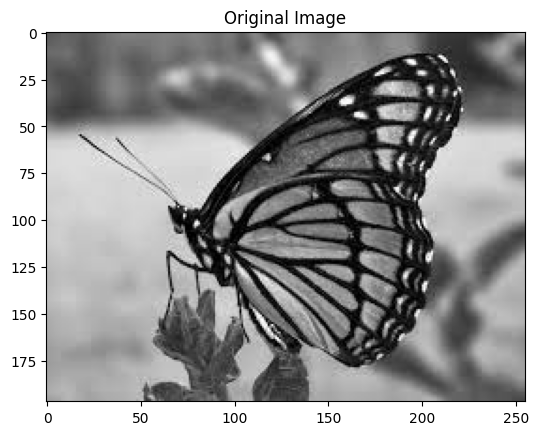

In [ ]:
image = cv2.imread('img.jfif', cv2.IMREAD_GRAYSCALE)

laplacian_x = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_y = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

edge_x = cv2.filter2D(image, -1, laplacian_x)
edge_y = cv2.filter2D(image, -1, laplacian_y)

edge_strength = np.sqrt(edge_x ** 2 + edge_y ** 2)

threshold = 50
edge_strength[edge_strength < threshold] = 0

plt.subplot(1, 1, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

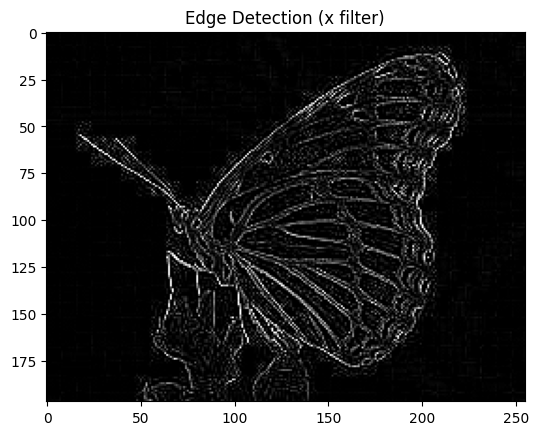

In [ ]:
plt.subplot(1, 1, 1)
plt.title('Edge Detection (x filter)')
plt.imshow(cv2.cvtColor(edge_x, cv2.COLOR_BGR2RGB))

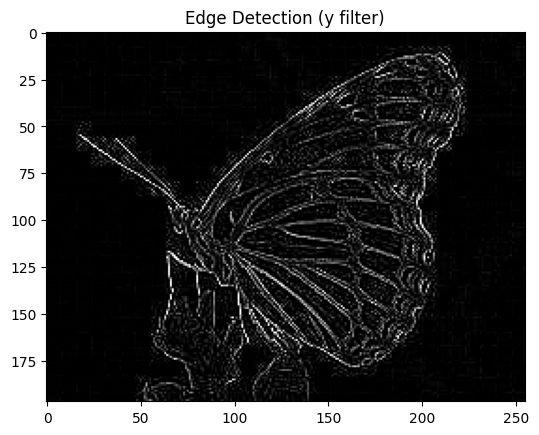

In [ ]:

plt.subplot(1, 1, 1)
plt.title('Edge Detection (y filter)')
plt.imshow(edge_y, cmap='gray')

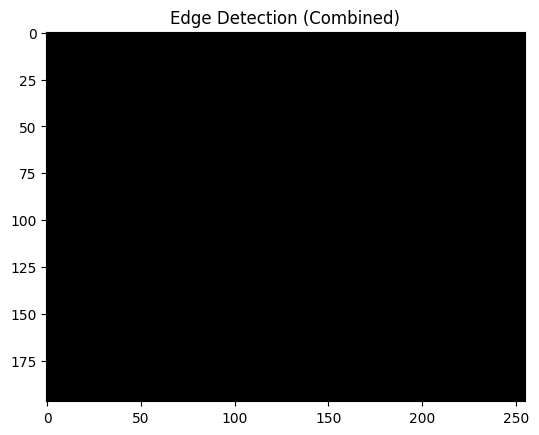

In [ ]:
plt.subplot(1, 1, 1)
plt.title('Edge Detection (Combined)')
plt.imshow(edge_strength, cmap='gray')